In [1]:
#import required libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix, plot_roc_curve


In [2]:
#read the dataset
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#drop unnecessary columns
data.drop(["Serial No."],axis=1,inplace=True)
data.head() 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#get the dataset stats
data.describe()  

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# meta-data of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
# check the number of null values in each attribute
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

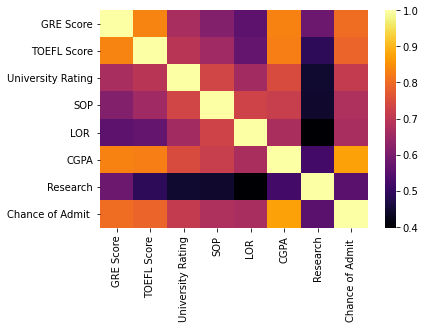

In [7]:
# find the correlation among attributes
sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,cmap='inferno')

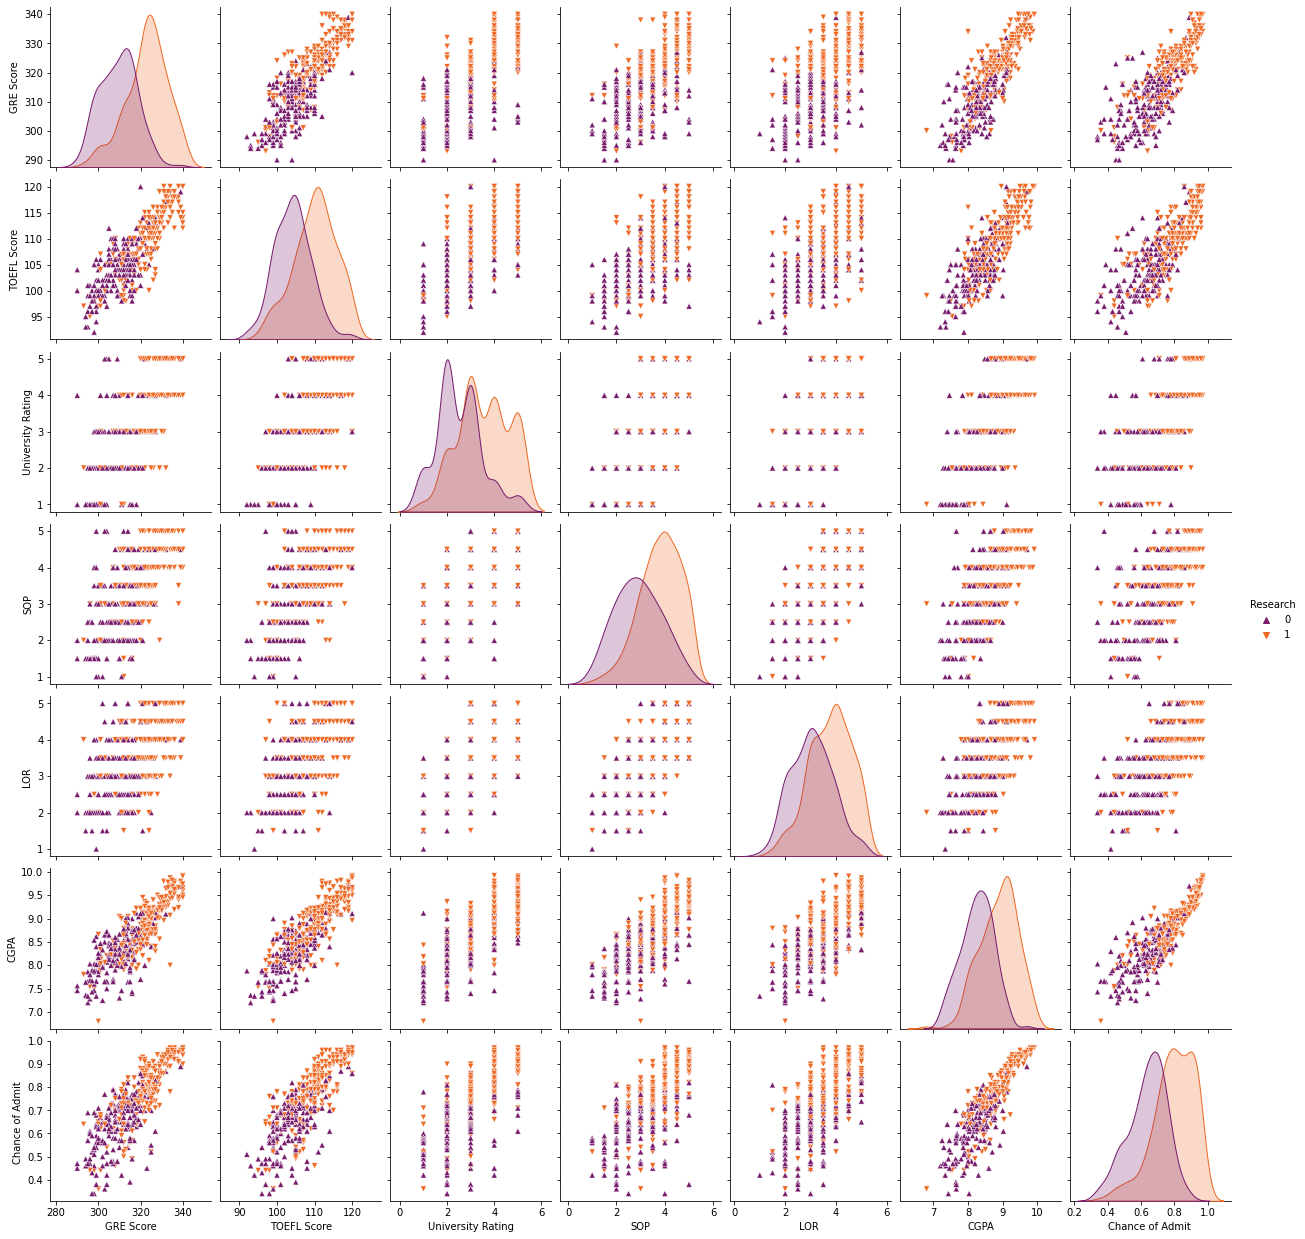

In [8]:
#pair-plot
sns.pairplot(data=data,hue='Research',markers=["^", "v"],palette='inferno')

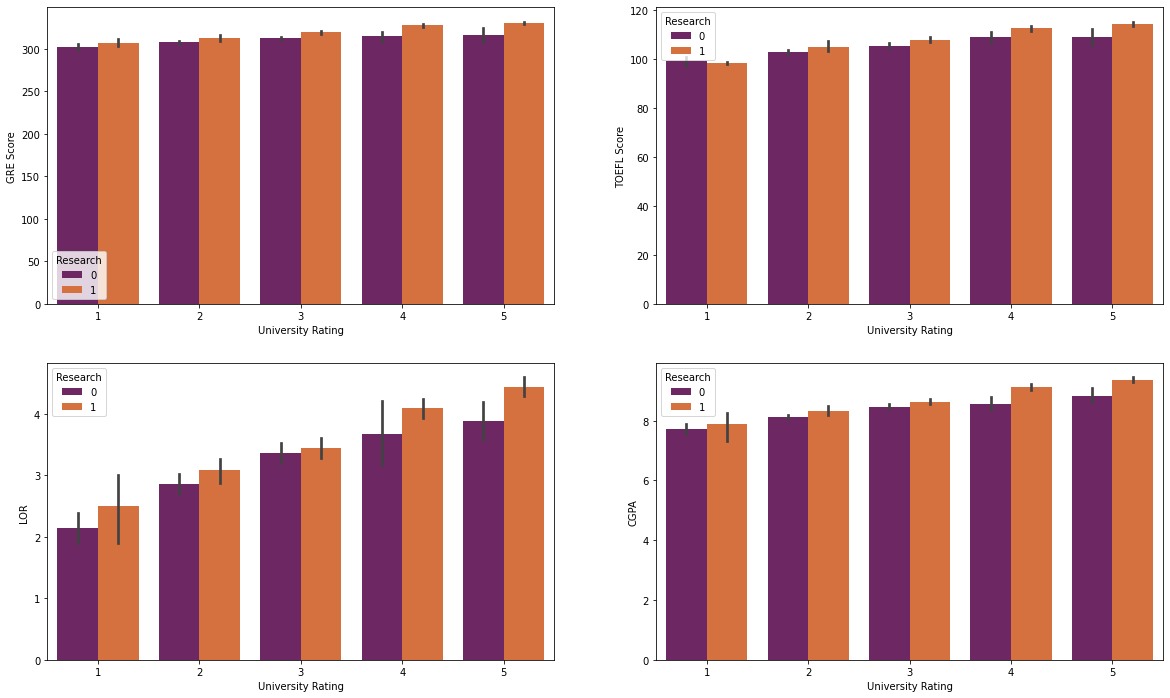

In [9]:
#plot scores vs University ranking
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

cols = list(data.columns[:2]) + list(data.columns[4:6])

k = 0
for i in range(2):
  for j in range(2):

    sns.barplot(x='University Rating',y=cols[k],data=data, hue='Research', ax=ax[i][j], 
                palette='inferno')
    k += 1

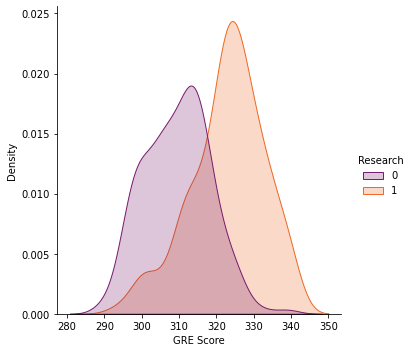

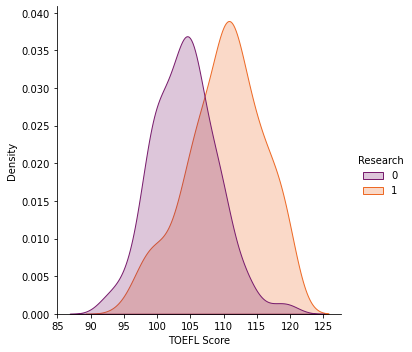

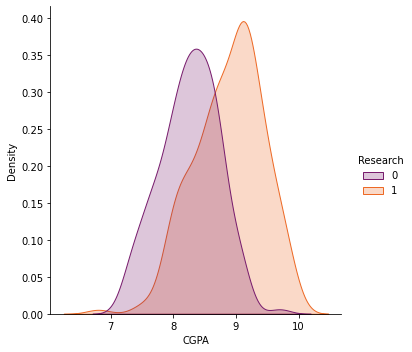

In [10]:
# visualize the distribution of the marks
cols = ['GRE Score', 'TOEFL Score',	'CGPA']

for i in range(3):
  sns.displot(data, x=cols[i], hue="Research", kind="kde", fill=True,
                palette='inferno')

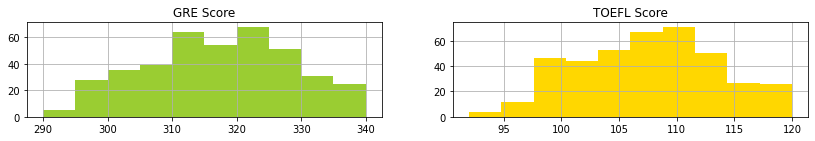

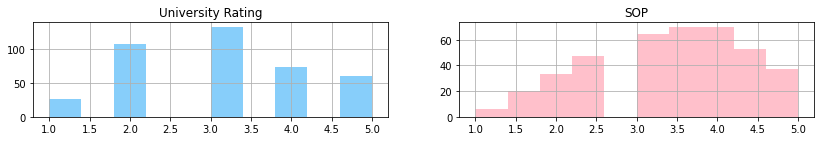

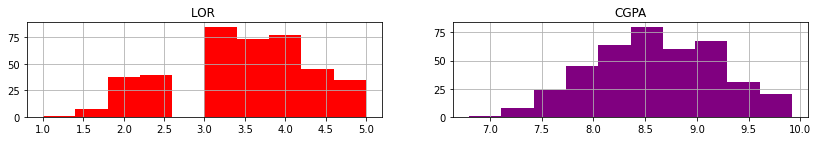

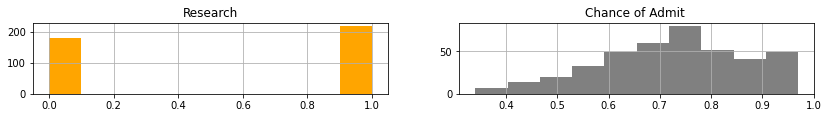

In [11]:
category = list(data.columns)
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(i,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [12]:
#categorical to numerical data conversion
data = pd.get_dummies(data, columns=['University Rating'])
data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,4.5,4.5,9.65,1,0.92,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0.76,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0.72,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0.80,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0.65,0,1,0,0,0


In [13]:
# independent attributes
x = data.drop('Chance of Admit ', axis=1).values

#target attribute
y = data['Chance of Admit '].values

print("Number of samples in the train-set {}".format(x.shape[0]))

Number of samples in the train-set 400


In [14]:
#normalize the dataset
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [15]:
# convert probablities to the discrete value i.e, 0 or 1
y = (y>=0.5)

In [16]:
#split into train-test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                random_state=42, shuffle=True, stratify=y)

#LogisticRegression

In [17]:
# Search optimal parameter for LogisticRegression
logistic = LogisticRegression(random_state =0)

grid_values = {'C': [0.001,0.01,0.1,1,10,100]}

grid_cv = GridSearchCV(logistic, param_grid = grid_values)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [18]:
print("Best LogisticRegression parameters {}  Best LogisticRegression score {}".format(
    grid_cv.best_params_, grid_cv.best_score_
))

Best LogisticRegression parameters {'C': 10}  Best LogisticRegression score 0.9375


In [19]:
#train model using optimal parameter
logistic = LogisticRegression(C=10).fit(x_train, y_train)


Accuracy score: 96.250000
Recall score : 100.000000
ROC score : 78.571429



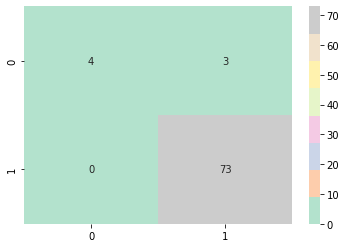

In [20]:
#predict the output
y_pred =logistic.predict(x_test)

# model's performance
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Pastel2') 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


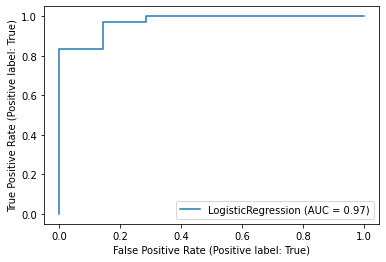

In [21]:
#plot roc curve
plot_roc_curve(logistic, x_test, y_test)

In [22]:
#output of the test set (chances of getting an admission)
print(y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True False  True  True]


In [23]:
#save and load the LogisticRegression model weights
pickle.dump(logistic,open('LogisticRegression.pkl','wb'))
model=pickle.load(open('LogisticRegression.pkl','rb'))

#RandomForestClassifier

In [ ]:
# Search optimal parameter for RandomForestClassifier
rf = RandomForestClassifier()

grid_values = { 
    'n_estimators': [75, 100, 125, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7],
    'criterion' :['gini', 'entropy']
}

grid_cv = GridSearchCV(rf, param_grid = grid_values)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [75, 100, 125, 150]})

In [ ]:
print("Best RandomForestClassifier parameters {}  Best RandomForestClassifier score {}".format(
    grid_cv.best_params_, grid_cv.best_score_
))

Best RandomForestClassifier parameters {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 150}  Best RandomForestClassifier score 0.94375


In [24]:
#train model using optimal parameter
rf = RandomForestClassifier(n_estimators=150,
                                  max_features='auto',
                                  max_depth=3,
                                  criterion='gini').fit(x_train, y_train)


Accuracy score: 92.500000
Recall score : 100.000000
ROC score : 57.142857



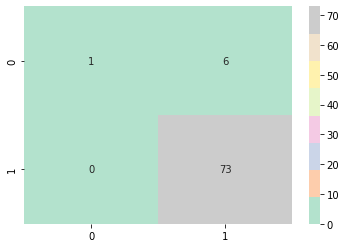

In [25]:
#predict the output
y_pred = rf.predict(x_test)

# model's performance
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
    
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Pastel2') 

In [26]:
#output of the test set (chances of getting an admission)
print(y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


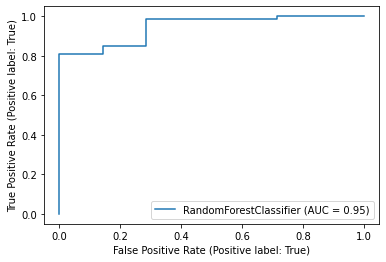

In [27]:
#plot roc curve
plot_roc_curve(rf, x_test, y_test)

In [28]:
#save and load the RandomForestClassifier model weights
pickle.dump(logistic,open('RandomForestClassifier.pkl','wb'))
model=pickle.load(open('RandomForestClassifier.pkl','rb'))

#SVM

In [ ]:
# Search optimal parameter for SVM
svc = SVC()

grid_values = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

grid_cv = GridSearchCV(svc, param_grid = grid_values)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']})

In [ ]:
print("Best SVC parameters {}  Best SVC score {}".format(
    grid_cv.best_params_, grid_cv.best_score_
))

Best SVC parameters {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}  Best SVC score 0.94375


In [29]:
#train model using optimal parameter
svc = SVC(C=100, gamma=0.1, kernel='rbf').fit(x_train, y_train)


Accuracy score: 95.000000
Recall score : 100.000000
ROC score : 71.428571



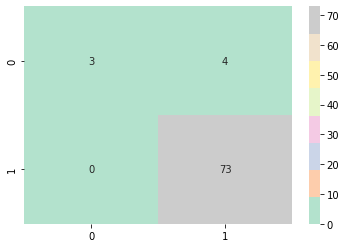

In [30]:
#predict the output
y_pred =svc.predict(x_test)

# model's performance
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred) * 100))
    
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Pastel2') 

In [31]:
#output of the test set (chances of getting an admission)
print(y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


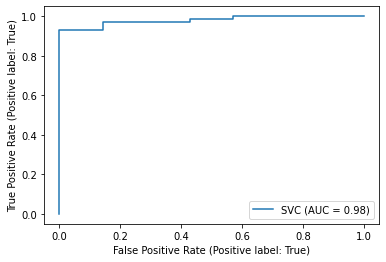

In [32]:

#plot roc curve
plot_roc_curve(svc, x_test, y_test)

In [33]:
#save and load the svc model weights
pickle.dump(logistic,open('svc.pkl','wb'))
model=pickle.load(open('svc.pkl','rb'))